
## Introducción
----

¿Qué veremos?
*  Como cargar la base de datos y limpiar datos faltantes




## Scikitlearn

La mayoría de los que están aprendiendo ciencia de datos con Python seguramente ya habrán oído hablar de scikit-learn, esl la biblioteca de código abierto de Python que implementa una amplia variedad de algoritmos de aprendizaje automático, preprocesamiento, validación cruzada y visualización con la ayuda de una interfaz unificada. 


Esta notebook de scikit-learn le presentará los pasos básicos que debe seguir para implementar algoritmos de aprendizaje automático con éxito: verá cómo cargar sus datos, cómo preprocesarlos, mas adelante veremos cómo crear un modelo al que puede ajustar sus datos y predecir las etiquetas objetivo, cómo validar su modelo y cómo ajustarlo para mejorar su rendimiento. 

## Preprocessamiento
La mayor parte de un proyecto de ciencia de datos consiste en la limpieza y manipulación de datos. La mayoría de estas tareas de limpieza de datos se pueden desglosar en seis áreas:

*  Imputación de valores perdidos. Imputación estadística constante estándar, imputación KNN.
*  Detección de anomalías. Algoritmos de detección de valores atípicos: Isolation Forest, One Class SVM, Local Outlier Factor.
*   Métodos de limpieza de variables X. Aplicación de funciones personalizadas, eliminación de duplicados, sustitución de valores.
*    Métodos de limpieza de variables Y. Codificación de etiquetas, mapeo de diccionarios, codificación de una sola vez.
*    Unión de marcos de datos. Concatenar, fusionar y unir.
*     Análisis de fechas. Auto-formato-detección de la conversión cadena-hora, objetos fecha-hora a números.

In [ ]:
## Unión de marcos de datos. Concatenar y  fusionar. 

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [ ]:
#!pip3 install sklearn

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [ ]:
import os
datapath = os.path.join("datasets","datosdemograficos", "")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Leer el dataset oecd_bli_2015.csv
Datos del OECD
https://stats.oecd.org/index.aspx?DataSetCode=BLI
El Índice de calidad de vida pretende discutir indicadores sobre el bienestar de las sociedades, y capacitarlos para que estén más informados y participen en el proceso de elaboración de políticas que da forma a todas nuestras vidas. Cada uno de los 11 temas del Índice se basa actualmente en uno o tres indicadores. Dentro de cada tema, los indicadores se promedian con igual peso. Los indicadores se han elegido en función de una serie de criterios estadísticos, como la relevancia (validez nominal, profundidad, relevancia política) y la calidad de los datos (validez predictiva, cobertura, actualidad, comparabilidad entre países, etc.) y en consulta con los países miembros de la OCDE.

# Cargar dataset

In [ ]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


## Leer el dataset de ingreso per cápita gdp_per_capita.csv
Datos del Fondo monetario internacional https://www.imf.org/en/Home

In [ ]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Filtrar las estadisticas por sexo para comparar "INEQUALITY" =="MN" o "WMN"

Extraer el indicador con pivot   
    foo   bar  baz  zoo
0   one   A    1    x
1   one   B    2    y
2   one   C    3    z
3   two   A    4    q
4   two   B    5    w
5   two   C    6    t

df.pivot(index='foo', columns='bar', values='baz')

bar  A   B   C
foo
one  1   2   3
two  4   5   6


User index="Country", columns="Indicator", values="Value"


In [ ]:
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


Ahora los datos del FMI

renombrar la columna 2015 por GDP per capita

Hacer que el pais sea el indice

Combinar los dos datasets

Ordenar por ingreso per capita

Cuantos paises hay

In [ ]:
len(datasetfinal)

36

Podemos tomar una muestra de 20

In [ ]:
muestra.describe()

,GDP per capita,Life satisfaction
count,20.000000,20.000000
mean,41037.318850,6.740000
std,19127.131244,0.856185
min,9054.914000,4.800000
25%,33306.301250,6.375000
50%,43467.538000,7.100000
75%,50881.403500,7.325000
max,80675.308000,7.500000


Visualizar el ingreso per capita vs life satisfaction datos y muestra

In [ ]:
ax = datasetfinal.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.xlim(0, 60000)
plt.ylim(0, 10)
plt.show()


Graficar una recta 

y=6+5*x/100000
y=6+1*x/100000

In [ ]:
X=np.linspace(0, 60000, 1000)


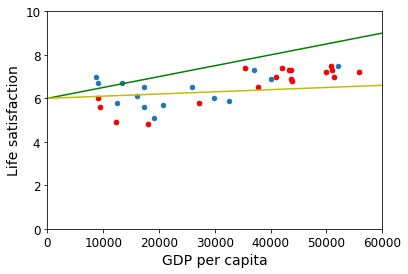

In [ ]:
ax = datasetfinal.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')


plt.xlim(0, 60000)
plt.ylim(0, 10)
plt.show()

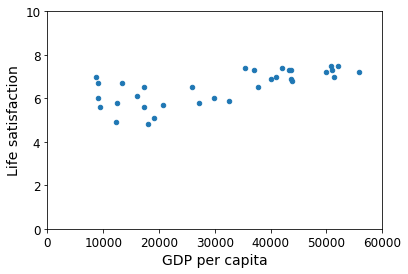

In [ ]:

datasetfinal.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.xlim(0, 60000)
plt.ylim(0, 10)
plt.show()



## Imputar valores faltantes


# Ejemplo con pandas y datos categóricos

In [ ]:
df = pd.read_csv('datasets/hepatitis.csv')
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


# Identificar los valores que faltan
Observamos que el conjunto de datos presenta algunos problemas. Por ejemplo, la columna correo electrónico no está disponible en todas las filas. En algunos casos presenta el valor `NaN`, lo que significa que el valor falta. 

Para comprobar si nuestro conjunto de datos contiene valores perdidos, podemos utilizar la función `isna()`, que devuelve si una celda del conjunto de datos es `NaN` o no. A continuación, podemos contar cuántos valores perdidos hay en cada columna.

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

Ahora podemos contar el porcentaje de valores perdidos para cada columna, simplemente dividiendo el resultado anterior por la longitud del conjunto de datos (len(df)) y multiplicando por 100.

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

Cuando se trata de valores perdidos, se pueden aplicar diferentes alternativas:
* comprobar la fuente, por ejemplo, poniéndose en contacto con la fuente de datos para corregir los valores que faltan
* eliminar los valores que faltan
* sustituir el valor que falta por un valor
* dejar el valor que falta tal y como está

## Eliminar los valores que faltan
La eliminación de los valores perdidos puede ser una de las siguientes alternativas:
* eliminar las filas con valores perdidos
* eliminar toda la columna que contenga valores perdidos
Podemos utilizar la función `dropna()` especificando el `eje` a considerar. Si ponemos `eje = 0` eliminamos toda la fila, si ponemos `eje = 1` eliminamos toda la columna. Si aplicamos la función `df.dropna(axis=0)` quedan 80 filas del conjunto de datos. Si aplicamos la función `df.dropna(axis=1)`, sólo quedan las columnas edad, sexo, antivirales, histología y clase. Sin embargo, los valores eliminados no se aplican al marco de datos original, sino sólo al resultado. Podemos utilizar el argumento `inplace=True` para almacenar los cambios en el marco de datos original `df` (`df.dropna(axis=1,inplace=True)`).


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live



Otra alternativa consiste en eliminar las columnas en las que se dispone de un determinado porcentaje de valores no nulos. Esto se puede conseguir mediante el parámetro `thresh`. En el siguiente ejemplo mantenemos sólo las columnas en las que hay al menos el 80% de valores no nulos. 

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,False,live


## Reemplazar valores perdidos
Una buena estrategia a la hora de tratar los valores perdidos consiste en sustituirlos por otro valor. Normalmente, se adoptan las siguientes estrategias:
* para los valores numéricos sustituir el valor que falta por el valor medio de la columna
* Para los valores categóricos, sustituya el valor que falta por el valor más frecuente de la columna. 
* utilizar otras funciones

Para sustituir los valores que faltan, se pueden utilizar tres funciones: `fillna()`, `replace()` y `interpolate()`.
La función `fillna()` sustituye todos los valores NaN por el valor pasado como argumento.
Por ejemplo, en el caso de los valores numéricos, todos los valores NaN de las columnas numéricas pueden ser sustituidos por el valor medio. 
Para listar el tipo de una columna, podemos utilizar el atributo `dtypes` de la siguiente manera:

In [ ]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [ ]:
numeric.columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin'], dtype='object')

Reemplazar con la media

<ipython-input-33-fdaac0744f5f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[numeric_columns] = df[numeric_columns].fillna(df.mean())


In [ ]:
df.isna().sum()/len(df)*100

age                0.000000
sex                0.000000
steroid            0.645161
antivirals         0.000000
fatigue            0.645161
malaise            0.645161
anorexia           0.645161
liver_big          6.451613
liver_firm         7.096774
spleen_palpable    3.225806
spiders            3.225806
ascites            3.225806
varices            3.225806
bilirubin          0.000000
alk_phosphate      0.000000
sgot               0.000000
albumin            0.000000
histology          0.000000
class              0.000000
dtype: float64

## Columnas categóricas
Observamos que en `dtypes` las columnas categoriales se describen como objetos. Por lo tanto, podemos seleccionar las columnas `objeto`. Nos gustaría considerar sólo las columnas booleanas. Sin embargo, el tipo `object` incluye también la columna `class`, que es una cadena. Seleccionamos todas las columnas de objetos y eliminamos de ellas la columna `class`. Entonces podemos convertir el tipo del resultado a `bool`.

In [ ]:
boolean_columns = df.select_dtypes(include=np.object).columns.tolist()
boolean_columns.remove('class')
df[boolean_columns] = df[boolean_columns].astype('bool')

Reemplazar con la moda

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,False,False,True,True,True
151,True,True,True,False,False,True,True,False,False,False,False
152,True,False,True,True,False,False,True,False,True,False,False
153,True,False,True,False,False,True,False,True,True,False,True


In [ ]:
df.isna().sum()/len(df)*100

age                0.0
sex                0.0
steroid            0.0
antivirals         0.0
fatigue            0.0
malaise            0.0
anorexia           0.0
liver_big          0.0
liver_firm         0.0
spleen_palpable    0.0
spiders            0.0
ascites            0.0
varices            0.0
bilirubin          0.0
alk_phosphate      0.0
sgot               0.0
albumin            0.0
histology          0.0
class              0.0
dtype: float64

## Interpolación
Otra solución para reemplazar los valores perdidos implica el uso de otras funciones, como la interpolación lineal. En este caso, por ejemplo, podríamos reemplazar un valor faltante sobre una columna, con la interpolación entre la anterior y la siguiente. Esto se puede conseguir mediante el uso de la función `interpolar()`.

Como ya hemos gestionado todos los valores perdidos, recargamos el conjunto de datos.

In [ ]:
df = pd.read_csv('datasets/hepatitis.csv')
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

Ahora podemos aplicar la función `interpolar()` a las columnas numéricas, estableciendo también la dirección del límite como `hacia adelante`. Esto significa que la interpolación lineal se aplica desde la primera fila hasta la última.

Por ejemplo, en la línea 6 la columna bilirrubina, que era NaN antes de la interpolación, asume ahora el valor 0,95, que es la interpolación entre 0,90 (línea 4) y 1,00 (línea 6).

In [ ]:
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.00,85.0,18.000000,4.000000,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.90,135.0,42.000000,3.500000,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.70,96.0,32.000000,4.000000,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.70,46.0,52.000000,4.000000,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.00,70.5,200.000000,4.000000,77.5,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.90,95.0,28.000000,4.000000,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,0.95,91.6,34.666667,4.133333,77.0,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.00,88.2,41.333333,4.266667,79.0,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.70,84.8,48.000000,4.400000,81.0,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.00,81.4,120.000000,3.900000,83.0,False,live


## Preprocesamiento de datos con scikit-learn - Valores perdidos


En este tutorial explotamos el conjunto de datos cupcake.csv, que contiene la tendencia de búsqueda de la palabra cupcake en Google Trends. Los datos se extraen de este enlace. En el conjunto de datos original se han eliminado los datos correspondientes a 2004-02 y 2006-03, para demostrar cómo tratar los valores perdidos. Los valores originales eran 5 y 10 respectivamente. Aprovechamos la biblioteca pandas para importar el conjunto de datos y lo transformamos en un marco de datos mediante la función read_csv().

In [ ]:
df = pd.read_csv('datasets/cupcake.csv')
df.head(5)

,Mese,Cupcake
0,2004-01,5.0
1,2004-02,NaN
2,2004-03,4.0
3,2004-04,6.0
4,2004-05,5.0


In [ ]:
X = np.array(df['Cupcake']).reshape(-1,1)


Los valores perdidos son valores que no están disponibles en el conjunto de datos original. Una solución para tratar los valores perdidos podría ser su eliminación del conjunto de datos. Sin embargo, esto conduce a la pérdida de datos. La biblioteca scikit-learn ofrece dos mecanismos para tratar los valores perdidos:

   * Imputación de características univariante
   * Imputación de características multivariantes
   * Imputación de vecinos más cercanos

## Imputación de características univariante

En la Imputación de Características Univariantes se trata de reemplazar los valores perdidos por un valor constante o alguna estadística proporcionada relacionada con una característica. La clase SimpleImputer puede utilizarse para realizar la imputación univariante de características. Especificamos cuál es el valor que falta a través del parámetro missing_values y la estrategia de reemplazo a través del parámetro strategy. Por ejemplo, podemos sustituir todos los valores NaN (identificados por la variable numpy.nan) por el valor medio de la columna.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer



Ahora podemos encajar el preprocesador con la columna `Cupcake` del dataframe. 


Ahora podemos ajustar el preprocesador con la columna `Cupcake` del dataframe. 


SimpleImputer()

Aplicamos la función `transform()` a nuestros datos.


In [ ]:
X_prep = 

Lo convertimos a la forma original aplicando la función inversa reshape() y almacenamos el resultado en una nueva columna del datafram df.


In [ ]:
df['Cupcake_univariate'] = X_prep.reshape(1,-1)[0]
df.head()

,Mese,Cupcake,Cupcake_univariate
0,2004-01,5.0,5.00
1,2004-02,NaN,50.05
2,2004-03,4.0,4.00
3,2004-04,6.0,6.00
4,2004-05,5.0,5.00


## Imputación de características multivariantes

En la imputación de características multivariantes, cada característica con valores perdidos se calcula en función de las demás características. Se construye una imputación iterativa por lo que se debe especificar el número máximo de iteraciones. Podemos utilizar la clase IterativeImputation. Consideramos dos características: la columna Cupcake y el índice del dataframe. Como el IterativeImputer está todavía en fase experimental, debemos habilitarlo explícitamente.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
preprocessor = IterativeImputer(max_iter=10, random_state=0)

Debemos convertir las dos características en matrices y transformarlas en la forma `[[f11,f21], [f12,f22] ...]`. Esto puede hacerse aplicando la función `reshape()` a cada característica y luego la función `hstack()` como sigue:


In [ ]:
X1 = np.array(df['Cupcake']).reshape(-1,1)
X2 = np.array(df.index).reshape(-1,1)
X = np.hstack((X1,X2))


Ajustamos el preprocesador con las características obtenidas.

IterativeImputer(random_state=0)

Y aplicamos el preprocesador a las mismas características X. Para recuperar el resultado de la operación, debemos aplicar la función hsplit(), que divide el array horizontalmente, y luego aplicamos la inversa reshape().

In [ ]:
X_prep = 
df['Cupcake_multivariate'] = np.hsplit(X_prep, 2)[0].reshape(1,-1)[0]

In [ ]:
df.iloc[26]

Mese                      2006-03
Cupcake                       NaN
Cupcake_univariate          50.05
Cupcake_multivariate    28.469457
Name: 26, dtype: object

## Imputación por vecinos más cercanos

Esta categoría de imputación rellena los valores que faltan utilizando el enfoque de los vecinos más cercanos. Cada valor que falta se calcula utilizando los valores de n_vecinos más cercanos que tienen un valor. Podemos utilizar la clase KNNImputer de la biblioteca scikit-learn. Para que funcione correctamente, debemos especificar al menos dos características. Así, explotamos la variable X, previamente definida.

In [ ]:
from sklearn.impute import KNNImputer


In [ ]:


df['Cupcake_knn'] = np.hsplit(X_prep, 2)[0].reshape(1,-1)[0]

In [ ]:
df.iloc[26]

Mese                      2006-03
Cupcake                       NaN
Cupcake_univariate          50.05
Cupcake_multivariate    28.469457
Cupcake_knn                  10.7
Name: 26, dtype: object

In [ ]:
df.iloc[1]

Mese                      2004-02
Cupcake                       NaN
Cupcake_univariate          50.05
Cupcake_multivariate    21.339636
Cupcake_knn              4.918919
Name: 1, dtype: object

<AxesSubplot:>

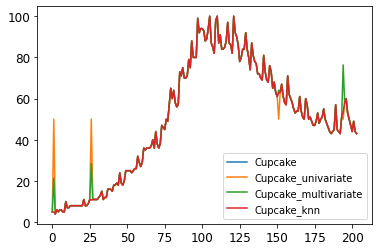

In [ ]:
df.plot()

## Preprocesamiento de datos - Normalización

La normalización de datos consiste en ajustar los valores medidos en diferentes escalas a una escala común. Cuando se trata de marcos de datos, la normalización de datos permite ajustar los valores referidos a diferentes columnas a una escala común. Esta operación es muy recomendable cuando las columnas de un marco de datos se consideran características de entrada de un algoritmo de aprendizaje automático, porque permite dar a todas las características el mismo peso.

La normalización sólo se aplica a las columnas que contienen valores numéricos. Existen cinco métodos de normalización:

  *  escalado de una característica
  *  mín. máx.
  *  puntuación z
  *  escala logarítmica
  *  recorte

In [ ]:
X = np.array(df['Cupcake_knn']).reshape(-1,1)


## Escalado de características individuales

El escalado de características simples convierte cada valor de una columna en un número entre 0 y 1. El nuevo valor se calcula como el valor actual dividido por el valor máximo de la columna. Esto se puede hacer a través de la clase MaxAbsScaler. Aplicamos el escalador a la columna de tampones, que mut se convierte en array y se remodela.


In [ ]:
from sklearn.preprocessing import MaxAbsScaler


In [ ]:
scaler =

In [ ]:
scaler


MaxAbsScaler()

In [ ]:
X_scaled = 


In [ ]:

df['Cupcake_knn_singleFeatureScaling'] = X_scaled.reshape(1,-1)[0]
df.head()

,Mese,Cupcake,Cupcake_univariate,Cupcake_multivariate,Cupcake_knn,Cupcake_knn_singleFeatureScaling
0,2004-01,5.0,5.00,5.000000,5.000000,0.050000
1,2004-02,NaN,50.05,21.339636,4.918919,0.049189
2,2004-03,4.0,4.00,4.000000,4.000000,0.040000
3,2004-04,6.0,6.00,6.000000,6.000000,0.060000
4,2004-05,5.0,5.00,5.000000,5.000000,0.050000


In [ ]:
scaler.inverse_transform(X_scaled)[:10]

array([[ 5.        ],
       [ 4.91891892],
       [ 4.        ],
       [ 6.        ],
       [ 5.        ],
       [ 6.        ],
       [ 6.        ],
       [ 5.        ],
       [ 5.        ],
       [10.        ]])

## Min Max 

Min Max convierte cada valor de una columna en un número entre 0 y 1. El nuevo valor se calcula como la diferencia entre el valor actual y el valor min, dividido por el rango de los valores de la columna. En scikit-learn utilizamos la clase MinMaxScaler. Por ejemplo, podemos aplicar el método min max a una columna.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.
X_scaled = scaler.


In [ ]:
df['Cupcake_knn_minmax'] = X_scaled.reshape(1,-1)[0]
df.head()

,Mese,Cupcake,Cupcake_univariate,Cupcake_multivariate,Cupcake_knn,Cupcake_knn_singleFeatureScaling,Cupcake_knn_minmax
0,2004-01,5.0,5.00,5.000000,5.000000,0.050000,0.010417
1,2004-02,NaN,50.05,21.339636,4.918919,0.049189,0.009572
2,2004-03,4.0,4.00,4.000000,4.000000,0.040000,0.000000
3,2004-04,6.0,6.00,6.000000,6.000000,0.060000,0.020833
4,2004-05,5.0,5.00,5.000000,5.000000,0.050000,0.010417


(array([36., 12., 13., 11., 34., 26., 18., 18., 22., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

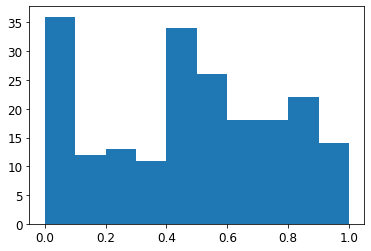

In [ ]:
plt.hist(df['Cupcake_knn_minmax'].values)

## Zscore
La puntuación Z convierte cada valor de una columna en un número en torno a 0. Los valores típicos que se obtienen mediante una transformación de puntuación z oscilan entre -3 y 3. El nuevo valor se calcula como la diferencia entre el valor actual y el valor medio, dividido por la desviación estándar. En scikit-learn podemos utilizar la función StandardScaler. Por ejemplo, podemos calcular la puntuación z de la columna deceduti.

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
scaler.
X_scaled = scaler.
df['Cupcake_knn_Zscore'] = X_scaled.reshape(1,-1)[0]
df.head()

,Mese,Cupcake,Cupcake_univariate,Cupcake_multivariate,Cupcake_knn,Cupcake_knn_singleFeatureScaling,Cupcake_knn_minmax,Cupcake_knn_Zscore
0,2004-01,5.0,5.00,5.000000,5.000000,0.050000,0.010417,-1.589874
1,2004-02,NaN,50.05,21.339636,4.918919,0.049189,0.009572,-1.592757
2,2004-03,4.0,4.00,4.000000,4.000000,0.040000,0.000000,-1.625430
3,2004-04,6.0,6.00,6.000000,6.000000,0.060000,0.020833,-1.554319
4,2004-05,5.0,5.00,5.000000,5.000000,0.050000,0.010417,-1.589874


(array([36., 12., 13., 11., 34., 26., 18., 18., 22., 14.]),
 array([-1.6254299 , -1.28409528, -0.94276066, -0.60142604, -0.26009142,
         0.0812432 ,  0.42257782,  0.76391243,  1.10524705,  1.44658167,
         1.78791629]),
 <BarContainer object of 10 artists>)

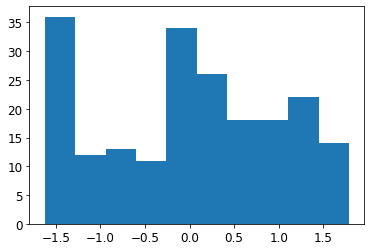

In [ ]:
plt.hist(df['Cupcake_knn_Zscore'].values)

## Escala logarítmica

El escalamiento logarítmico implica la conversión de una columna a la escala logarítmica. Si queremos utilizar el logaritmo natural, podemos utilizar la función log() de la biblioteca numpy. Por ejemplo, podemos aplicar el escalado log a la columna dimessi_guariti. Debemos tratar con log(0) porque no existe. Utilizamos el operador lambda para seleccionar las filas individuales de la columna.



In [ ]:
df['Cupcake_knn_log'] = df['Cupcake_knn'].apply(  )

## Recorte

El recorte implica la limitación de todos los valores por debajo o por encima de un determinado valor. El recorte es útil cuando una columna contiene algunos valores atípicos. Podemos establecer un valor máximo vmax y un valor mínimo vmin y establecer todos los valores atípicos mayores que el valor máximo en vmax y todos los valores atípicos menores que el valor mínimo en vmin. Por ejemplo, podemos considerar la columna ricoverati_con_sintomi y podemos establecer vmax = 10000 y vmin = 10.

In [ ]:
vmax = 10000
vmin = 10

df['Cupcake_knn_clip'] = df['Cupcake_knn'].apply()

## Categorizacion de variables continuas:Binning
El binning (o bucketing) de datos agrupa los datos en bins (o buckets), en el sentido de que sustituye los valores contenidos en un pequeño intervalo por un único valor representativo de ese intervalo. A veces, el binning mejora la precisión de los modelos predictivos.

El binning de datos es un tipo de preprocesamiento de datos, un mecanismo que incluye también el tratamiento de los valores perdidos, el formateo, la normalización y la estandarización.

El binning puede aplicarse para convertir valores numéricos en categóricos o para muestrear (cuantificar) valores numéricos. 

    convertir valores numéricos en categóricos incluye el binning por distancia y el binning por frecuencia
    reducir los valores numéricos incluye la cuantificación (o muestreo).

El binning es una técnica de suavización de datos. El suavizado de datos se emplea para eliminar el ruido de los datos.

# Clasificación por distancia

En este caso definimos los bordes de cada bin. Agrupamos los valores relacionados con la columna Cupcake en tres grupos: pequeño, mediano y grande. Para ello, tenemos que calcular los intervalos dentro de cada grupo cae. Calculamos el intervalo como la diferencia entre el valor máximo y el mínimo y luego dividimos este intervalo en tres partes, una para cada grupo. Aprovechamos las funciones min() y max() de dataframe para calcular el valor mínimo y el valor máximo de la columna Cupcake.


In [ ]:
min_value = df['Cupcake'].min()
max_value = df['Cupcake'].max()
print(min_value)
print(max_value)

4.0
100.0


Ahora podemos calcular el rango de cada intervalo, es decir, el valor mínimo y máximo de cada intervalo. Como tenemos 3 grupos, necesitamos 4 bordes de intervalos (bins):

*    pequeño - (borde1, borde2)
*    mediano - (arista2, arista3)
*   grande - (borde3, borde4)

Podemos utilizar la función linspace() del paquete numpy para calcular los 4 bins, igualmente distribuidos.


In [ ]:
bins = 
bins
#bins = [ 0, 10, 50, 100 ]


array([  4.,  36.,  68., 100.])

In [ ]:
labels = ['pequenho', 'mediano', 'grande']

Podemos utilizar la función cut() para convertir los valores numéricos de la columna Cupcake en valores categóricos. Tenemos que especificar los intervalos y las etiquetas. Además, establecemos el parámetro include_lowest a True para incluir también el valor mínimo.


In [ ]:
df['bin_cut_linspace'] = 

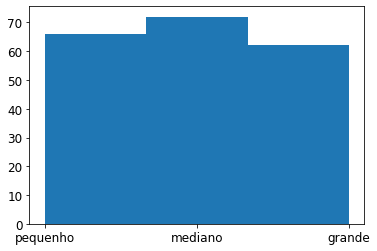

In [ ]:
plt.hist(df['bin_cut_linspace'].dropna(), bins=3)
plt.show()

# Categorizacion por frecuencia

El agrupamiento por frecuencia calcula el tamaño de cada recipiente para que cada uno contenga el (casi) mismo número de observaciones, pero el rango del recipiente variará. Podemos utilizar la función qcut() de pandas Python. Podemos establecer el parámetro de precisión para definir el número de puntos decimales.





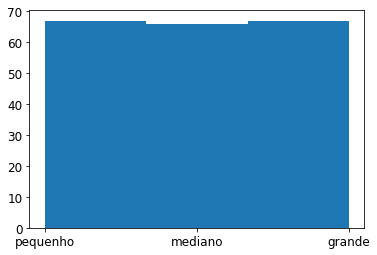

In [ ]:
df['bin_qcut'] = pd.qcut()
plt.hist(df['bin_qcut'].dropna(), bins=3)
plt.show()

# Categoriazacion por Muestreo

El muestreo es otra técnica de agrupación de datos. Permite reducir el número de muestras, agrupando valores similares o contiguos. Existen tres enfoques para realizar el muestreo

 *   por la media de las casillas: cada valor de una casilla se sustituye por el valor medio de la casilla.
 *   por la mediana del contenedor: cada valor del contenedor se sustituye por el valor de la mediana del mismo.
 *   por el límite de la bandeja: cada valor de la bandeja se sustituye por el valor más cercano al límite, es decir, el valor máximo o mínimo de la bandeja.

Para realizar el muestreo, se puede utilizar la función binned_statistic() del paquete scipy.stats. Esta función recibe como entrada dos matrices, x_data e y_data, así como los estadísticos que se van a utilizar (por ejemplo, la mediana o la media) y el número de contenedores que se van a crear. La función devuelve los valores de los bins así como los bordes de cada bin.



In [ ]:
from scipy.stats import binned_statistic
x_data = np.arange(0, len(df.dropna()))
y_data = df['Cupcake'].dropna()
x_bins,bin_edges, misc =

Ahora debemos aproximar cada valor de la columna df['Cupcake'] al valor de la mediana del bin correspondiente. Así, convertimos los bordes del bin en un IntervalIndex, que recibe como índice los bordes izquierdo y derecho de cada intervalo. En nuestro caso, los bordes izquierdos comienzan desde el principio de los bordes del bin y no contienen el último valor de los bordes del bin. Los bordes de la derecha, en cambio, comienzan desde el segundo valor de los bordes del contenedor y duran hasta el último valor.


In [ ]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

Podemos categorizar la columna Cupcake definiendo una función set_to_median() que recorre los intervalos y cuando encuentra el intervalo correcto, devuelve el valor medio.


In [ ]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [ ]:
df['sampled_cupcake'] = df['Cupcake'].apply(lambda x: set_to_median(x, bin_intervals))

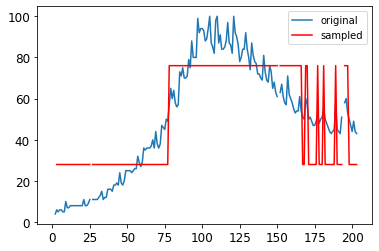

In [ ]:
plt.plot(df['Cupcake'], label='original')
plt.plot(df['sampled_cupcake'], color='red', label='sampled')
plt.legend()
plt.show()

## Detección de valores atípicos

La detección de valores atípicos en un conjunto de datos implica el descubrimiento de elementos con un comportamiento anormal. La detección de valores atípicos puede considerarse una técnica de preprocesamiento, al igual que la detección de valores perdidos, la normalización, la estandarización, el formateo de datos, el agrupamiento de datos y la eliminación de duplicados. 

Existen diferentes técnicas para la detección de valores atípicos:

 *   Análisis de valores extremos: este enfoque supone que los valores demasiado grandes o demasiado pequeños son valores atípicos. Esta técnica incluye la prueba Z y la prueba t de Student;
 *   Modelos probabilísticos y estadísticos: estos enfoques asumen distribuciones específicas para los datos. Los valores atípicos son los puntos con baja probabilidad;
 *   Modelos lineales: estos enfoques aprovechan la distancia de cada punto de datos respecto a un plano específico para encontrar valores atípicos. Estas técnicas incluyen el PCA (análisis de componentes principales);
*    Modelos basados en la proximidad: en estos modelos los valores atípicos son puntos que están aislados del resto de las observaciones. Estas técnicas incluyen el análisis de clústeres, el análisis basado en la densidad y el vecindario más cercano;
 *   Modelos teóricos de la información: en estos modelos los valores atípicos aumentan la longitud mínima del código para describir un conjunto de datos;
 *   Detección de valores atípicos de alta dimensión: estos modelos implementan métodos específicos para manejar datos dispersos de alta dimensión.


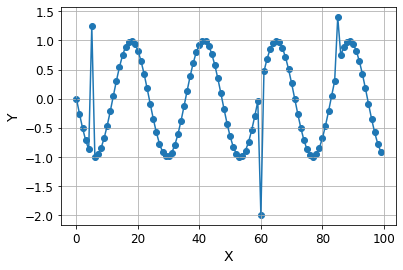

In [ ]:
X = np.arange(0,100)
Y = np.sin(50*X)
Y[5] = 1.25
Y[60] = -2
Y[85] = 1.4
n_outliers = 3
plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Modelos basados en la proximidad

Estos modelos consideran los valores atípicos como puntos aislados del resto de las observaciones. Los principales modelos basados en la proximidad son

  *  el análisis de conglomerados
  *  el análisis basado en la densidad
  *  vecindad más cercana.

La biblioteca pyod implementa los siguientes algoritmos:

   * LOF (Local Outlier Factor)
   * COF (Factor de valores atípicos basado en la conectividad)
   * CBLOF (Clustering-Based Local Outlier Factor)
   * LOCI (Integral de Correlación Local)
   * HBOS (puntuación de valores atípicos basada en el histograma)
   * kNN (k vecinos más cercanos)
   * AvgKNN (kNN medio)
   * MedKNN (kNN medio)
   * SOD (Detección de valores atípicos en el subespacio)
   * ROD (Detección de valores atípicos basada en la rotación)

Aqui mostramos un ejemplo del modelo KNN. En primer lugar, reformulo los datos de Y en un formato que pueda darse como entrada al modelo KNN(). A continuación, construyo el modelo KNN y lo ajusto con Y. Finalmente, predigo los valores atípicos mediante la función predict().

In [ ]:
from pyod.models.knn import KNN

Y = Y.reshape(-1, 1)
clf = KNN()


In [ ]:
Y_outliers = Y[np.where(outliers==1)]
X_outliers = X[np.where(outliers==1)]
Y_inliers = Y[np.where(outliers==0)]
X_inliers = X[np.where(outliers==0)]

In [ ]:
plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
plt.legend()
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()